In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load dataset
df = pd.read_csv("datanews.csv")

# Drop unnecessary columns
df = df.drop(columns=["links", "keywords"])

# Combine headline + short description
df["text"] = df["headline"] + " " + df["short_description"]

# Drop missing values
df.dropna(subset=["text", "category"], inplace=True)

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Preprocess function
def preprocess(text):
    text = re.sub(r'\W', ' ', text.lower())
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess)

# Check categories
print("Categories:", df["category"].value_counts())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Categories: category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


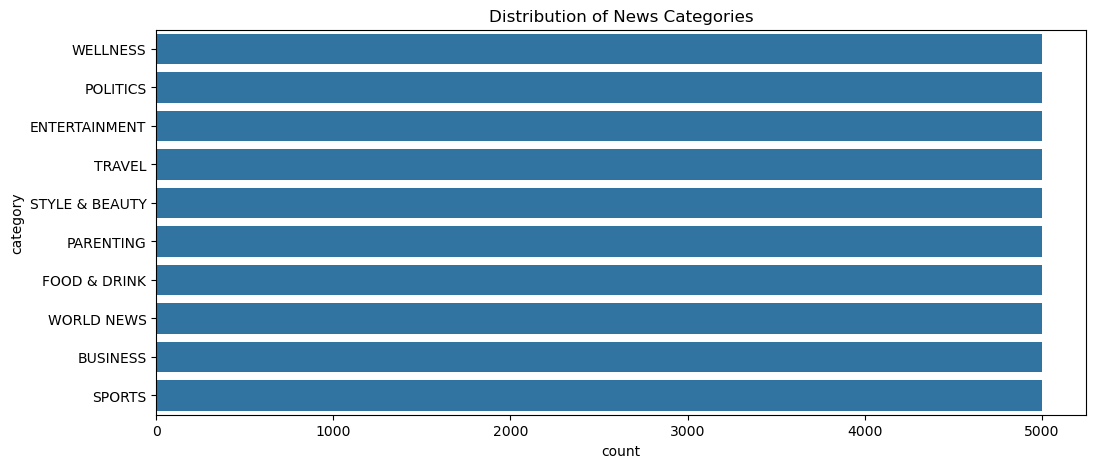

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()
y = df["category"]

# EDA - Plot category distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="category", order=df["category"].value_counts().index)
plt.title("Distribution of News Categories")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# Train & cross-validate
for name, model in models.items():
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} CV Accuracy: {np.mean(scores):.4f}")


Logistic Regression CV Accuracy: 0.7974
Naive Bayes CV Accuracy: 0.7834
SVM CV Accuracy: 0.7938


Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.81      0.77       955
 ENTERTAINMENT       0.81      0.77      0.79       985
  FOOD & DRINK       0.85      0.84      0.84      1021
     PARENTING       0.77      0.75      0.76      1030
      POLITICS       0.80      0.74      0.77      1034
        SPORTS       0.87      0.91      0.89       995
STYLE & BEAUTY       0.85      0.87      0.86       986
        TRAVEL       0.81      0.79      0.80      1008
      WELLNESS       0.73      0.73      0.73      1009
    WORLD NEWS       0.78      0.81      0.80       977

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000



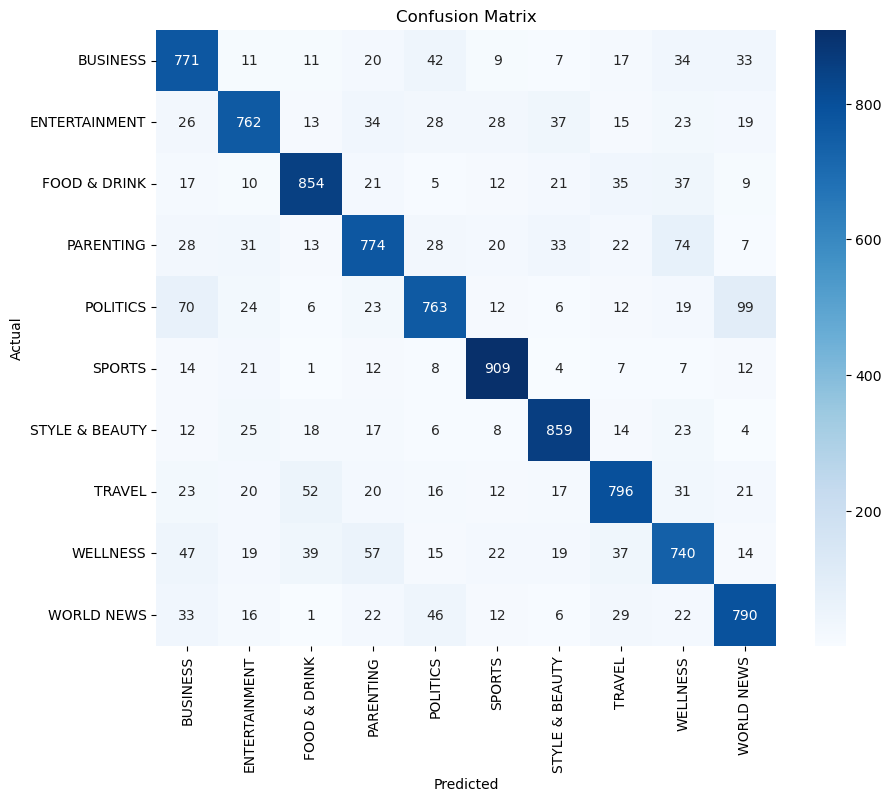

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Choose best model (e.g., SVM)
best_model = models["SVM"]
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=best_model.classes_, yticklabels=best_model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
